**How to Query the Google Analytics Sample Dataset (BigQuery)**

In [38]:
import bq_helper
from bq_helper import BigQueryHelper
# https://www.kaggle.com/sohier/introduction-to-the-bq-helper-package
google_analytics = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="data:google_analytics_sample")

In [40]:
bq_assistant.head("ga_sessions_20160801", num_rows=3)

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,None,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,None,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,None,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged


## Exploring the columns one by one
* Totals
* Traffic Source
* Device
* geoNetwork
* customDimensions
* hits 	

## Totals

In [42]:
# Totals columns
query1 = """SELECT totals
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE visitid =1470046245

"""
response1 = google_analytics.query_to_pandas_safe(query1)

response1.totals.iloc[0]

{'visits': 1,
 'hits': 24,
 'pageviews': 17,
 'timeOnSite': 287,
 'bounces': None,
 'transactions': None,
 'transactionRevenue': None,
 'newVisits': 1,
 'screenviews': None,
 'uniqueScreenviews': None,
 'timeOnScreen': None,
 'totalTransactionRevenue': None,
 'sessionQualityDim': None}

## Traffic Source

In [43]:
query1 = """SELECT trafficSource
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE visitid =1470046245
"""
ts = google_analytics.query_to_pandas_safe(query1)

ts.trafficSource.iloc[0]

{'referralPath': None,
 'campaign': '(not set)',
 'source': 'google',
 'medium': 'organic',
 'keyword': '(not provided)',
 'adContent': None,
 'adwordsClickInfo': {'campaignId': None,
  'adGroupId': None,
  'creativeId': None,
  'criteriaId': None,
  'page': None,
  'slot': None,
  'criteriaParameters': 'not available in demo dataset',
  'gclId': None,
  'customerId': None,
  'adNetworkType': None,
  'targetingCriteria': None,
  'isVideoAd': None},
 'isTrueDirect': None,
 'campaignCode': None}

## Device

In [46]:
query1 = """SELECT Device
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE visitid =1470046245
"""
device = google_analytics.query_to_pandas_safe(query1)

device.Device.iloc[0]

{'browser': 'Firefox',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Linux',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'javaEnabled': None,
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

## geoNetworks

In [51]:
query1 = """SELECT geoNetwork
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE visitid =1470046245
"""
geo = google_analytics.query_to_pandas_safe(query1)

geo.geoNetwork.iloc[0]

{'continent': 'Europe',
 'subContinent': 'Western Europe',
 'country': 'Germany',
 'region': 'not available in demo dataset',
 'metro': 'not available in demo dataset',
 'city': 'not available in demo dataset',
 'cityId': 'not available in demo dataset',
 'networkDomain': 'scalamedia.de',
 'latitude': 'not available in demo dataset',
 'longitude': 'not available in demo dataset',
 'networkLocation': 'not available in demo dataset'}

## customDimentions

In [50]:
query1 = """SELECT customDimensions
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE visitid =1470046245
"""
response1 = google_analytics.query_to_pandas_safe(query1)
response1.customDimensions.iloc[0]

[{'index': 4, 'value': 'EMEA'}]

## hits

In [56]:
query1 = """SELECT hits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE visitNumber =1
LIMIT 1
"""
Hit = google_analytics.query_to_pandas_safe(query1)

Query cancelled; estimated size of 4.652824048884213 exceeds limit of 1 GB


# This dataset contains the infromation from an E-commerce website: The Gogle MErchandise store, where the following items can be bought:
* hats
* Notebooks
* wears
* toys... etc

SInce it is an E-commerce website , then it is important to know the following:
* where  most of the traffic is coming from
* what country visits he most
* what  time of th month is there the most traffic
* if certain operating systems generate more traffic than others

# The Operating System with the most Visits

In [70]:
import seaborn as sns

In [69]:
query1 = """SELECT device.operatingSystem,
SUM ( totals.hits) AS total_hits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
GROUP BY
device.operatingSystem
ORDER BY
total_hits DESC;
        """
response1 = google_analytics.query_to_pandas_safe(query1)
response1.head(10)

,operatingSystem,total_hits
0,Macintosh,1428529
1,Windows,1334356
2,Android,502047
3,iOS,459423
4,Chrome OS,210536
5,Linux,202882
6,(not set),10095
7,Windows Phone,4093
8,Samsung,601
9,BlackBerry,461


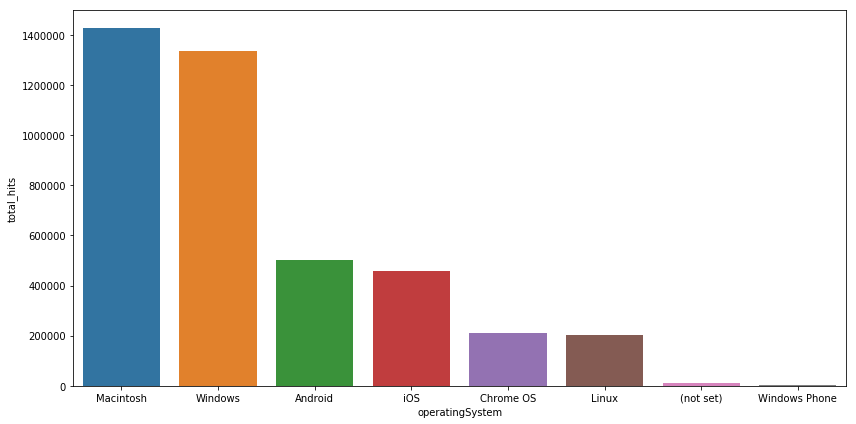

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(data  = response1[:8],y='total_hits',x='operatingSystem')
plt.tight_layout()

## GeoNetworks
* The country that contains Most users


In [87]:
query1 = """SELECT geoNetwork.country,
SUM ( totals.hits) AS total_hits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
GROUP BY
geoNetwork.country
ORDER BY
total_hits DESC;
        """
response1 = google_analytics.query_to_pandas_safe(query1)
response1.head(10)

,country,total_hits
0,United States,2483593
1,Canada,159092
2,India,155266
3,United Kingdom,107145
4,Japan,74251
5,Germany,61728
6,Taiwan,55745
7,France,53444
8,Australia,49544
9,Brazil,48529


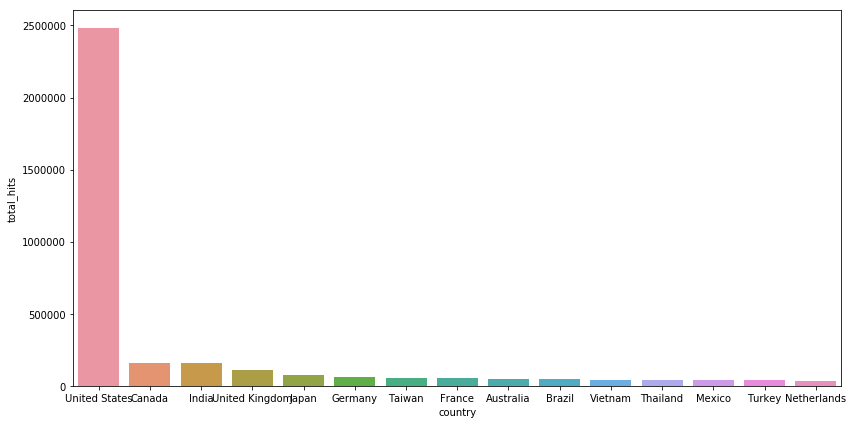

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(data  = response1[:15],y='total_hits',x='country')
plt.tight_layout()

## in what month does the website have the most visits?

In [99]:
query2 = """SELECT date, COUNT(totals.visits) as visits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
group by date
        """
response2 = google_analytics.query_to_pandas_safe(query2)
response2.head(10)

,date,visits
0,20160905,2125
1,20160919,2689
2,20170623,2095
3,20170619,2142
4,20161113,3144
5,20170627,2789
6,20170102,1620
7,20170310,2194
8,20160816,2873
9,20160810,2757


In [129]:
from datetime import datetime
date_df = response2.copy()

def extract_year(df):
    new_year = datetime.strptime(str(df),'%Y%M%d')
#     new_year = datetime(year)
    main_year = new_year.strftime('%Y')
    return main_year

def extract_month(df):
    new_year = datetime.strptime(str(df),'%Y%m%d')
#     new_year = datetime(year)
    main_year = new_year.strftime('%b')
    return main_year

In [128]:
a = datetime.strptime('20200405','%Y%m%d')
b = a.strftime('%b')
b

'Apr'

In [134]:
date_df['YEAR'] = date_df['date'].apply(extract_year)
date_df['Month'] = date_df['date'].apply(extract_month)


In [138]:
date_df.head()

,date,visits,YEAR,Month
0,20160905,2125,2016,Sep
1,20160919,2689,2016,Sep
2,20170623,2095,2017,Jun
3,20170619,2142,2017,Jun
4,20161113,3144,2016,Nov


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


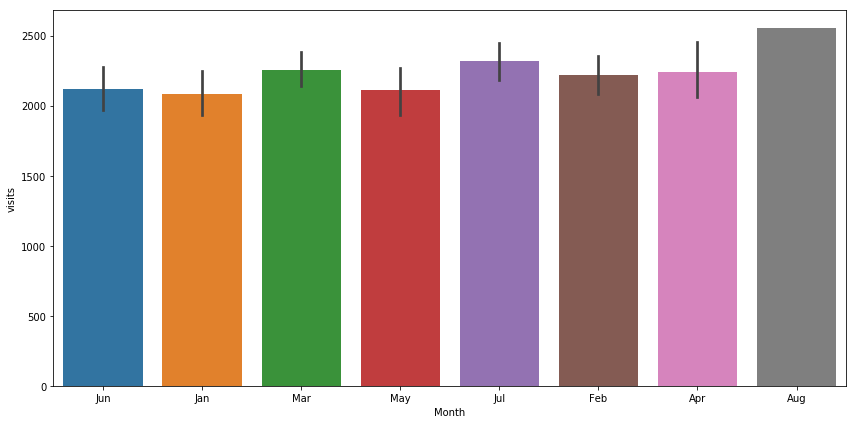

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(data = date_df[date_df.YEAR == '2017'],x = 'Month',y='visits')
plt.tight_layout()


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


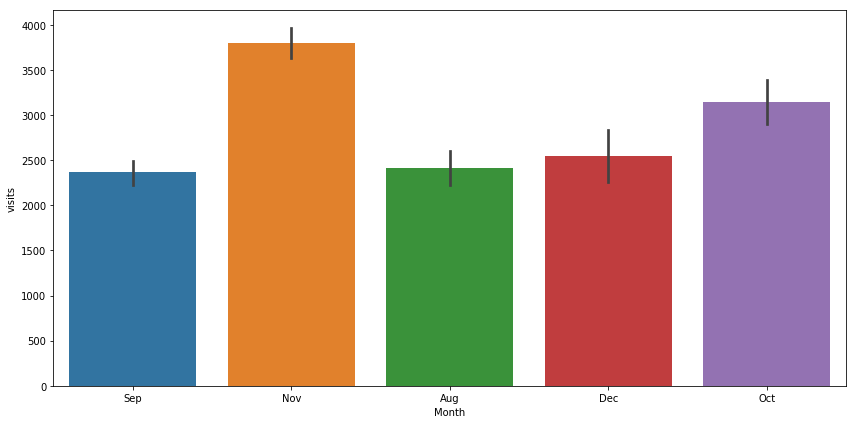

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(data = date_df[date_df.YEAR == '2016'],x = 'Month',y='visits')
plt.tight_layout()


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


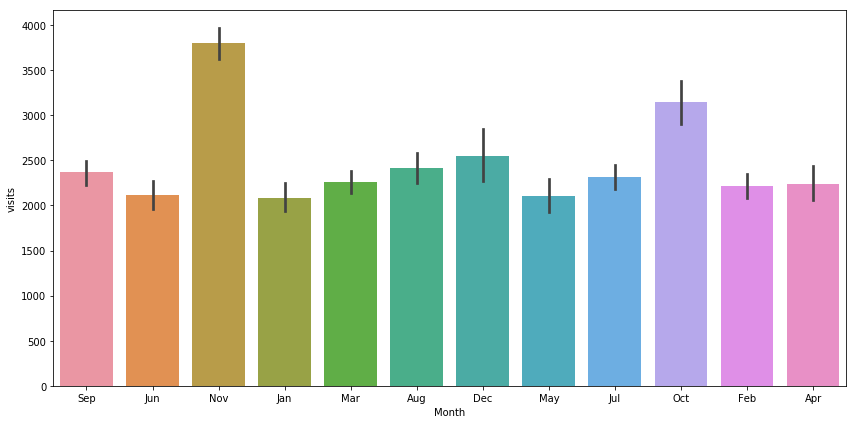

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(data = date_df,x = 'Month',y='visits')
plt.tight_layout()


for som 

Credit: Many functions are adapted from https://support.google.com/analytics/answer/4419694?hl=en